In [1]:
pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import mediapipe as mp
import numpy as np

# Mediapipe 설정
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 옷 합성 함수
def overlay_clothes(img, clothes, left_shoulder, right_shoulder):
    # 어깨 중심점 계산
    center_shoulder = ((left_shoulder[0] + right_shoulder[0]) // 2, 
                       (left_shoulder[1] + right_shoulder[1]) // 2)

    # 옷의 너비와 높이 계산
    clothes_width = right_shoulder[0] - left_shoulder[0]
    aspect_ratio = clothes.shape[0] / clothes.shape[1]
    clothes_height = int(clothes_width * aspect_ratio)

    # 옷을 어깨 너비에 맞추어 크기 조정
    resized_clothes = cv2.resize(clothes, (clothes_width, clothes_height))

    # 옷 이미지의 y-축 위치 조정 (예: 어깨 중심점보다 약간 위로)
    y_offset = center_shoulder[1] - resized_clothes.shape[0]

    # 옷을 합성할 범위 계산
    y1, y2 = max(0, y_offset), min(img.shape[0], y_offset + resized_clothes.shape[0])
    x1, x2 = max(0, center_shoulder[0] - clothes_width // 2), min(img.shape[1], center_shoulder[0] + clothes_width // 2)

    # 합성 영역 확인
    overlay_area = img[y1:y2, x1:x2]

    # 옷 이미지에서 알파 채널 확인 및 합성
    for i in range(resized_clothes.shape[0]):
        for j in range(resized_clothes.shape[1]):
            if resized_clothes[i, j, 3] > 0:
                overlay_area[i, j] = resized_clothes[i, j][:3]

    return img

# 메인 코드
with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
    # 사진 불러오기
    person_img = cv2.imread('models_eva.png')
    top_clothes_img = cv2.imread('clothes/pink_shirt.png', cv2.IMREAD_UNCHANGED) # 알파 채널 포함하여 불러오기
    
    # 포즈 추정
    person_img_rgb = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)
    results = pose.process(person_img_rgb)
    
    if results.pose_landmarks:
        # 상의 위치에 옷 합성
        modified_img = overlay_on_image(person_img.copy(), top_clothes_img, 
                                        results.pose_landmarks.landmark, 
                                        mp_pose.PoseLandmark.LEFT_SHOULDER, 
                                        mp_pose.PoseLandmark.RIGHT_SHOULDER)
        
        # 결과 표시
        cv2.imshow('Original Image', person_img)
        cv2.imshow('Modified Image', modified_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Pose not detected.")


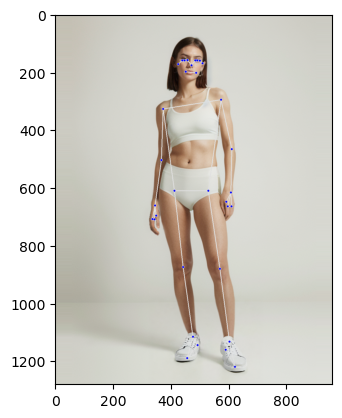

In [4]:
from matplotlib import pyplot as plt

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# 이미지를 불러오기
image = cv2.imread('models_eva.png')
# BGR 이미지를 RGB로 변환
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 포즈 랜드마크 감지
results = pose.process(image)

# 랜드마크를 이미지에 그리기
mp_drawing = mp.solutions.drawing_utils
mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# 결과 보기
plt.imshow(image)
plt.show()
